<a href="https://colab.research.google.com/github/huesofenigma/DS4A_energy/blob/main/ds4a_feature%E2%81%A0%E2%81%A0_engineering_isabella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DS4A Data Exploration Template

> This is Isabella's notebook.






In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set up google drive mount for this notebook, and create global variables for relevant data paths.
# Make sure that you have the DS4A folder added to your own Drive!

from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/DS4A/data"

Mounted at /content/drive


In [3]:
# Read in sample data as a dataframe
# Feel free to comment out datasets that you don't need
oil_exp_2015 = pd.read_csv(data_path + "/Crude oil Exports_2015.csv")
oil_imp_15_17 = pd.read_csv(data_path + "/Crude Oil Import_20152017.csv")
elec_prod_2016 = pd.read_csv(data_path + "/Electricity Production_2016.csv")

In [4]:
emdat = pd.read_excel(data_path + "/emdat_public_2022_07_11_query_uid-ChyDFd.xlsx", skiprows=6)

In [19]:
# We should transform value to a per capita measurement
elec_prod_2016

,name,slug,value,date_of_information,ranking,region
0,China,china,"5,883,000,000,000",2016 est.,1,East and Southeast Asia
1,United States,united-states,"4,095,000,000,000",2016 est.,2,North America
2,India,india,"1,386,000,000,000",2016 est.,3,South Asia
3,Russia,russia,"1,031,000,000,000",2016 est.,4,Central Asia
4,Japan,japan,"989,300,000,000",2016 est.,5,East and Southeast Asia
...,...,...,...,...,...,...
213,"Saint Helena, Ascension, and Tristan da Cunha",saint-helena-ascension-and-tristan-da-cunha,"7,000,000",2016 est.,215,Africa
214,Niue,niue,"3,000,000",2016 est.,216,Australia and Oceania
215,Northern Mariana Islands,northern-mariana-islands,"60,600",2009,217,Australia and Oceania
216,Gaza Strip,gaza-strip,"51,000",2011 est.,218,Middle East


In [22]:
oil_exp_2015

,name,slug,value,date_of_information,ranking,region
0,Saudi Arabia,saudi-arabia,"7,341,000",2015 est.,1,Middle East
1,Russia,russia,"4,921,000",2015 est.,2,Central Asia
2,Iraq,iraq,"3,092,000",2015 est.,3,Middle East
3,Canada,canada,"2,818,000",2017 est.,4,North America
4,United Arab Emirates,united-arab-emirates,"2,552,000",2015 est.,5,Middle East
...,...,...,...,...,...,...
211,Vanuatu,vanuatu,0,2015 est.,213,Australia and Oceania
212,Virgin Islands,virgin-islands,0,2015 est.,214,Central America and the Caribbean
213,West Bank,west-bank,0,2015 est.,215,Middle East
214,Zambia,zambia,0,2015 est.,216,Africa


In [57]:
oil_exp_temp = pd.to_numeric(oil_exp_2015.set_index('slug')['value'].str.replace(',', '')).rename('oil_exports')
elec_temp = pd.to_numeric(elec_prod_2016.set_index('slug')['value'].str.replace(',', '')).rename('elec_prod')
oil_exp_elec = pd.concat([oil_exp_temp, elec_temp], axis=1).dropna()
oil_exp_elec

,oil_exports,elec_prod
slug,,
saudi-arabia,7341000.0,3.241000e+11
russia,4921000.0,1.031000e+12
iraq,3092000.0,7.545000e+10
canada,2818000.0,6.496000e+11
united-arab-emirates,2552000.0,1.218000e+11
...,...,...
vanuatu,0.0,6.300000e+07
virgin-islands,0.0,7.040000e+08
west-bank,0.0,1.093000e+09


In [56]:
oil_exp_2015.set_index('slug')['value'].str.replace(',', '').rename('oil_exports')

slug
saudi-arabia            7341000
russia                  4921000
iraq                    3092000
canada                  2818000
united-arab-emirates    2552000
                         ...   
vanuatu                       0
virgin-islands                0
west-bank                     0
zambia                        0
zimbabwe                      0
Name: oil_exports, Length: 216, dtype: object

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


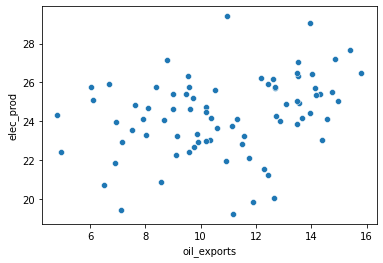

In [61]:
# %change in electricity production vs %change in oil exports
sns.scatterplot(x=np.log(oil_exp_elec['oil_exports']), y=np.log(oil_exp_elec['elec_prod']))